INSTALACIÓN

In [1]:
!pip3 install geomstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ahora clonamos el repositorio

In [2]:
!git clone https://github.com/geomstats/geomstats.git

Cloning into 'geomstats'...
remote: Enumerating objects: 47692, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 47692 (delta 1), reused 0 (delta 0), pack-reused 47687
Receiving objects: 100% (47692/47692), 149.36 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (36543/36543), done.


Fijamos el *backend* y damos una semilla.

In [3]:
import geomstats.backend as gs

gs.random.seed(2020)

INFO: Using numpy backend


Importamos módulos auxiliares para graficar y visualizar

In [6]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

In [7]:
from geomstats import geometry

CONSTRUYENDO ESFERAS

Con la función 
```
# Hypersphere
```
se define una esfera, para la cuál fijamos la dimensión en este ejemplo a 2. 

Con la función 


```
# random.uniform
```
podemos seleccionar una muestra aleatoria de puntos en la esfera. En este ejemplo son 2, también.


In [8]:
from geomstats.geometry.hypersphere import Hypersphere

dim = 2         # Se fija la dimensión de la variedad
n_samples = 2   # Declaramos la cantidad de puntos dentro de la muestra


sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 [[-0.14573203  0.15373756  0.97730596]
 [-0.349178   -0.48842141  0.79969947]]
Mean of points:
 [-0.24745501 -0.16734192  0.88850272]


GRÁFICA

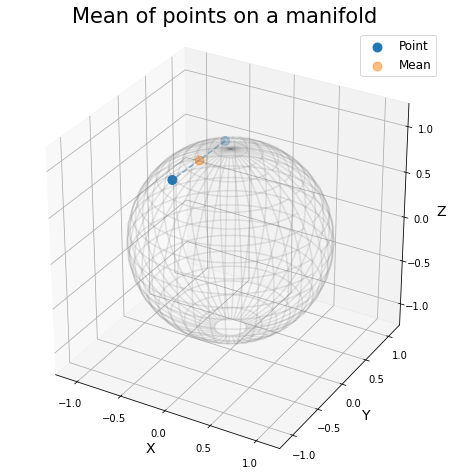

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(
    points_in_manifold, ax=ax, space='S2', label='Point', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend();

¿QUÉ SE PUEDE HACER CON PUNTOS EN LA ESFERA?

In [10]:
print(sphere.belongs(linear_mean))

False


In [11]:
import geomstats.datasets.utils as data_utils

In [12]:
data, names = data_utils.load_cities()
print(names[:5])
print(data[:5])

['Tokyo', 'New York', 'Mexico City', 'Mumbai', 'São Paulo']
[[ 0.61993792 -0.52479018  0.58332859]
 [-0.20994315  0.7285533   0.65202298]
 [ 0.14964311  0.93102728  0.33285904]
 [-0.27867026 -0.9034188   0.32584868]
 [-0.62952884  0.6662902  -0.3996884 ]]


In [13]:
sphere.belongs(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

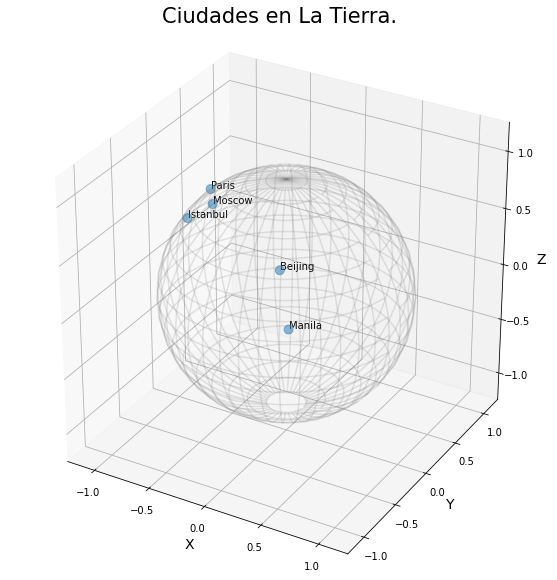

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Ciudades en La Tierra.');

VECTORES TANGENTES

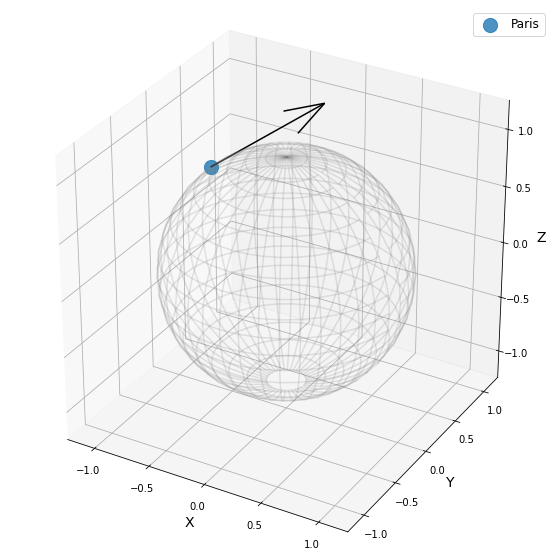

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

paris = data[19]
vector = gs.array([1, 0, 0.8])

ax = visualization.plot(paris, ax=ax, space='S2', s=200, alpha=0.8, label='Paris')

arrow = visualization.Arrow3D(paris, vector=vector)
arrow.draw(ax, color='black')
ax.legend();

In [16]:
tangent_vector = sphere.to_tangent(vector, base_point=paris)

CALCULAR GEODÉSICAS

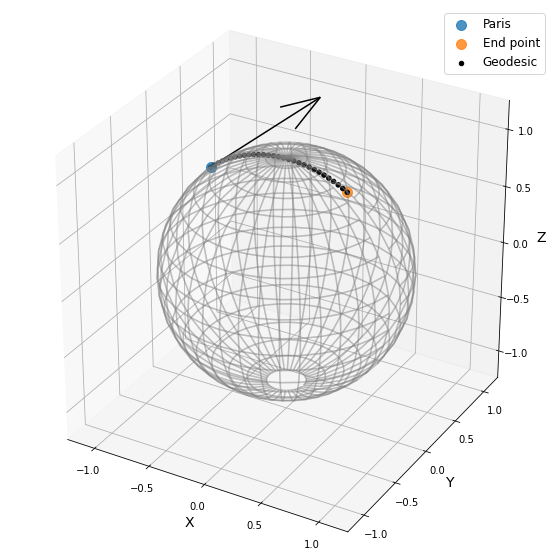

In [17]:
result = sphere.metric.exp(tangent_vector, base_point=paris)
geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='End point')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

FUNCIÓN LOGARITMO

In [18]:
paris = data[19]
beijing = data[15]

log = sphere.metric.log(point=beijing, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        end_point=beijing)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

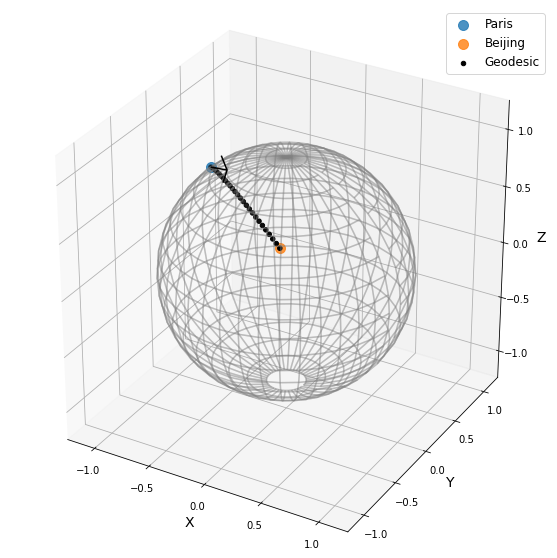

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(beijing, ax=ax, space='S2', s=100, alpha=0.8, label='Beijing')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=log)
arrow.draw(ax, color='black')
ax.legend();

CALCULAR LOS SIMBOLOS DE CHRISTOFFEL

In [20]:
sphere.metric.christoffels(paris, point_type='spherical')

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.48367223]],

       [[ 0.        , -1.29577972],
        [-1.29577972,  0.        ]]])

Cambio de coordenadas

In [21]:
print(paris)

[-0.65726771 -0.02678122  0.7531812 ]


In [22]:
paris_extri=sphere.intrinsic_to_extrinsic_coords(paris)
print(paris_extri)

[-0.61073699  0.0163602   0.79166449]


In [23]:
paris_int=sphere.extrinsic_to_intrinsic_coords(paris_extri)
print(paris_int)

[0.65726771 3.11481143]


CALCULAR DISTANCIAS

In [25]:
sphere.metric.dist(paris, beijing)

1.2892896363992132

MÉTRICA

In [26]:
vectora = sphere.metric.log(point=beijing, base_point=paris)

In [27]:
sphere.metric.inner_product(vector, vectora, base_point=paris)

1.1669660994249682

In [28]:
sphere.metric.squared_norm(vector, base_point=paris)

1.6400000000000001

TRANSPORTE PARALELO

In [29]:
sphere.metric.parallel_transport(vector, vectora, base_point=paris)

TypeError: ignored

MEDIA DE FRECHET

In [30]:
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

In [31]:
sphere = Hypersphere(dim=2)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

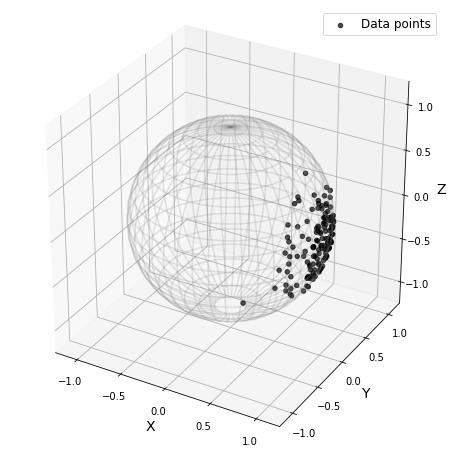

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.7, label='Data points')
ax.legend();

In [33]:
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)

mean_estimate = mean.estimate_

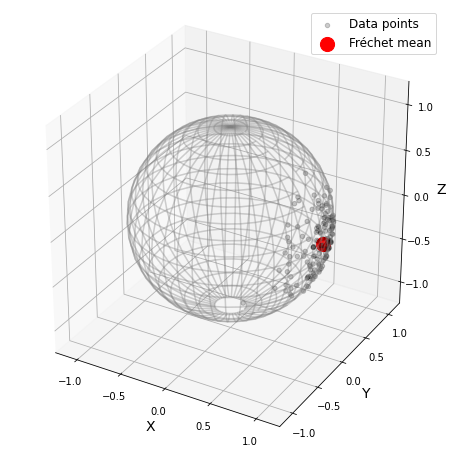

In [34]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(mean_estimate, space='S2', color='red', ax=ax, s=200, label='Fréchet mean')
ax.legend();

In [35]:
tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

In [36]:
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

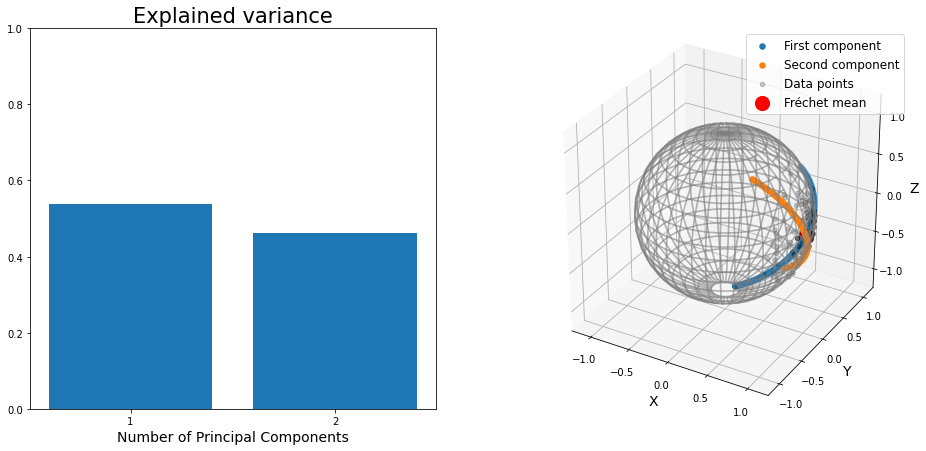

In [37]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122, projection="3d")

ax = visualization.plot(
    geodesic_points_0, ax, space='S2', linewidth=2, label='First component')
ax = visualization.plot(
    geodesic_points_1, ax, space='S2', linewidth=2, label='Second component')
ax = visualization.plot(
    data, ax, space='S2', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(
    mean_estimate, ax, space='S2', color='red', s=200, label='Fréchet mean')
ax.legend()
plt.show()

OTRAS PAQUETERÍAS

In [38]:
from geomstats import geometry

In [39]:
from geomstats.geometry import hyperbolic